# W1M1 - mtcars 데이터셋 분석하기

## DataFrame methods을 사용해서 데이터셋의 결과를 출력

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub의 CSV 파일 URL
url = "https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv"

# CSV 파일 읽기
df = pd.read_csv(url)

In [4]:
# 데이터 확인 head, tail
print(df.head())    # 데이터 상위 5개를 직접 출력
print(df.tail())    # 데이터 하위 5개를 직접 출력

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
        Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   

In [5]:
# 데이터프레임의 전체 크기 확인
print(df.shape)  # (행 개수, 열 개수)

(32, 12)


In [6]:
# 행(row) 개수 출력
row_count = df.shape[0]
print(f"Row count: {row_count}")

Row count: 32


In [7]:
# 열(column) 개수 출력
column_count = df.shape[1]
print(f"Column count: {column_count}")

Column count: 12


In [8]:
# 데이터프레임의 컬럼 이름 확인
print(df.columns)

# 이름이 없는 컬럼 확인 (Unnamed 포함 여부)
unnameed_columns = [col for col in df.columns if 'Unnamed' in col or col.strip() == '']
print(f"Unnamed columns: {unnameed_columns}")

# 'Column_0' 컬럼 이름 변경
df.rename(columns={'Column_0': 'Car Name'}, inplace=True)

# 변경 확인
print(df.columns)

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')
Unnamed columns: ['Unnamed: 0']
Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


#### Info(): 데이터프레임의 전체 요약 정보를 출력합니다.
- 데이터의 총 행과 열의 개수
- 각 열의 데이터 타입(dtype)
- 결측값 개수
- 메모리 사용량 등

In [9]:
# 데이터프레임 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#### dtypes
- 각 열의 데이터 타입(dtype)을 출력합니다.
- 이는 열별 데이터가 int, float, object(문자열)인지 확인할 때 유용합니다.

In [10]:
# 데이터프레임의 열별 데이터 타입 출력
print(df.dtypes)

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object


#### describe(): 데이터프레임의 기술 통계 정보를 출력합니다.
- 수치형 데이터에 대해 기본적인 통계량(평균, 표준편차, 최솟값, 최댓값 등)을 확인할 수 있습니다.
    - 	기본적으로 수치형 데이터만 포함됩니다.
    - include='all' 옵션을 추가하면 문자열 데이터의 요약 정보도 확인할 수 있습니다.

In [11]:
# 기본 기술 통계
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

In [12]:
# 모든 데이터 유형에 대해 기술 통계
print(df.describe(include='all'))

       Unnamed: 0        mpg        cyl        disp          hp       drat  \
count          32  32.000000  32.000000   32.000000   32.000000  32.000000   
unique         32        NaN        NaN         NaN         NaN        NaN   
top     Mazda RX4        NaN        NaN         NaN         NaN        NaN   
freq            1        NaN        NaN         NaN         NaN        NaN   
mean          NaN  20.090625   6.187500  230.721875  146.687500   3.596563   
std           NaN   6.026948   1.785922  123.938694   68.562868   0.534679   
min           NaN  10.400000   4.000000   71.100000   52.000000   2.760000   
25%           NaN  15.425000   4.000000  120.825000   96.500000   3.080000   
50%           NaN  19.200000   6.000000  196.300000  123.000000   3.695000   
75%           NaN  22.800000   8.000000  326.000000  180.000000   3.920000   
max           NaN  33.900000   8.000000  472.000000  335.000000   4.930000   

               wt       qsec         vs         am       gear  

In [13]:
# 데이터프레임 요약 정보
df.info()

# 열별 데이터 타입 확인
print(df.dtypes)

# 기술 통계 정보 출력
print(df.describe())

# 문자열 포함 전체 기술 통계
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int

---

# gear, transmission features에는 각각 몇가지 값이 있는지를 출력하기
- gear, transmission features에는 각각 몇가지 값이 있는지를 출력하세요.
- gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아내세요.
    - 먼저 결과값을 화면에 출력하세요.
    - 결과값을 바 그래프로 그리세요. 타이틀은 '# of Cars by Gear x Transmission'로, x축 레이블은 '(Gear, Auto Transmission)', y축 레이블은 '# of Cars'로 만드세요


### gear x transmission 조합 구하기
gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아낼 때 1)pandas.crosstab method를 사용하는 방법과 2)사용하지 않는 방법, 2가지 모두의 결과값을 각각 출력해야 합니다.

#### 1. 고유 값 개수 확인 (nunique())
nunique()는 열에 있는 고유 값의 개수를 반환합니다.

In [14]:
# gear 열의 고유 값 개수
gear_count = df['gear'].nunique()
print(f"Number of unique values in 'gear': {gear_count}")

# transmission(am) 열의 고유 값 개수
transmission_count = df['am'].nunique()
print(f"Number of unique values in 'transmission': {transmission_count}")

Number of unique values in 'gear': 3
Number of unique values in 'transmission': 2


#### 2. 고유 값 자체 확인 (unique())
unique()는 고유 값의 배열을 반환합니다.

In [15]:
# gear 열의 고유 값 출력
gear_values = df['gear'].unique()
print(f"Unique values in 'gear': {gear_values}")

# transmission(am) 열의 고유 값 출력
transmission_values = df['am'].unique()
print(f"Unique values in 'transmission': {transmission_values}")

Unique values in 'gear': [4 3 5]
Unique values in 'transmission': [1 0]


#### 3. 고유 값과 개수를 함께 출력 (value_counts())
value_counts()를 사용하면 고유 값과 각 값의 빈도를 알 수 있습니다.

In [16]:
# gear 열의 값과 개수
print("Value counts for 'gear':")
print(df['gear'].value_counts())

# transmission(am) 열의 값과 개수
print("Value counts for 'transmission':")
print(df['am'].value_counts())

Value counts for 'gear':
gear
3    15
4    12
5     5
Name: count, dtype: int64
Value counts for 'transmission':
am
0    19
1    13
Name: count, dtype: int64


Crosstab Result:
am     0  1
gear       
3     15  0
4      4  8
5      0  5


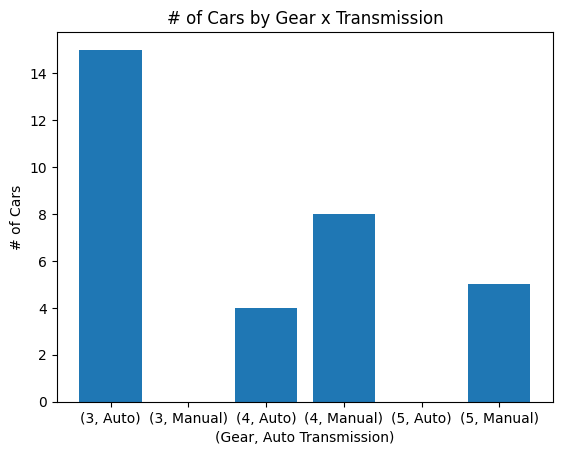

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 로드
url = "https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv"
df = pd.read_csv(url)
df.rename(columns={'Unnamed: 0': 'Car Name'}, inplace=True)

# Crosstab을 사용한 조합 계산
crosstab_result = pd.crosstab(df['gear'], df['am'])

# 결과 출력
print("Crosstab Result:")
print(crosstab_result)

# Crosstab 결과를 긴 형식으로 변환
crosstab_long = crosstab_result.stack().reset_index()
crosstab_long.columns = ['Gear', 'Transmission', 'Count']
crosstab_long['Transmission'] = crosstab_long['Transmission'].map({0: 'Auto', 1: 'Manual'})

# Bar Plot
plt.bar(
    x=[f"({row.Gear}, {row.Transmission})" for row in crosstab_long.itertuples()],
    height=crosstab_long['Count'],
)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()


Grouped Result:
   gear  am  count
0     3   0     15
1     4   0      4
2     4   1      8
3     5   1      5


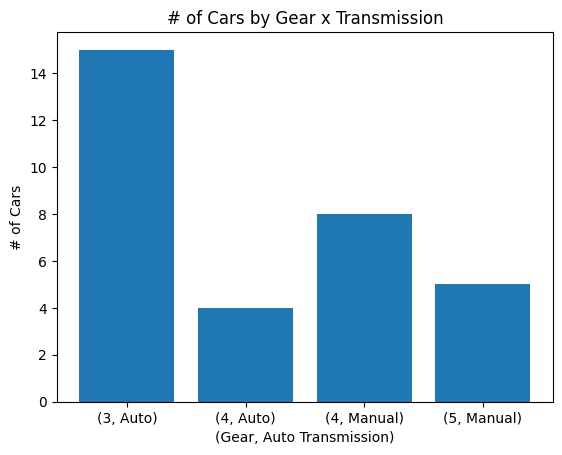

In [18]:
# groupby를 사용한 조합 계산
grouped_result = df.groupby(['gear', 'am']).size().reset_index(name='count')

# 결과 출력
print("\nGrouped Result:")
print(grouped_result)

# Bar Plot
grouped_result['Transmission'] = grouped_result['am'].map({0: 'Auto', 1: 'Manual'})
plt.bar(
    x=[f"({row.gear}, {row.Transmission})" for row in grouped_result.itertuples()],
    height=grouped_result['count'],
)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()

---

#### 데이터셋에 포함된 모든 features의 히스토그램을 그리기
그래프 타이틀은 "Histograms of Variables"  
최대한 잘 보이도록 그래프들을 배치하기

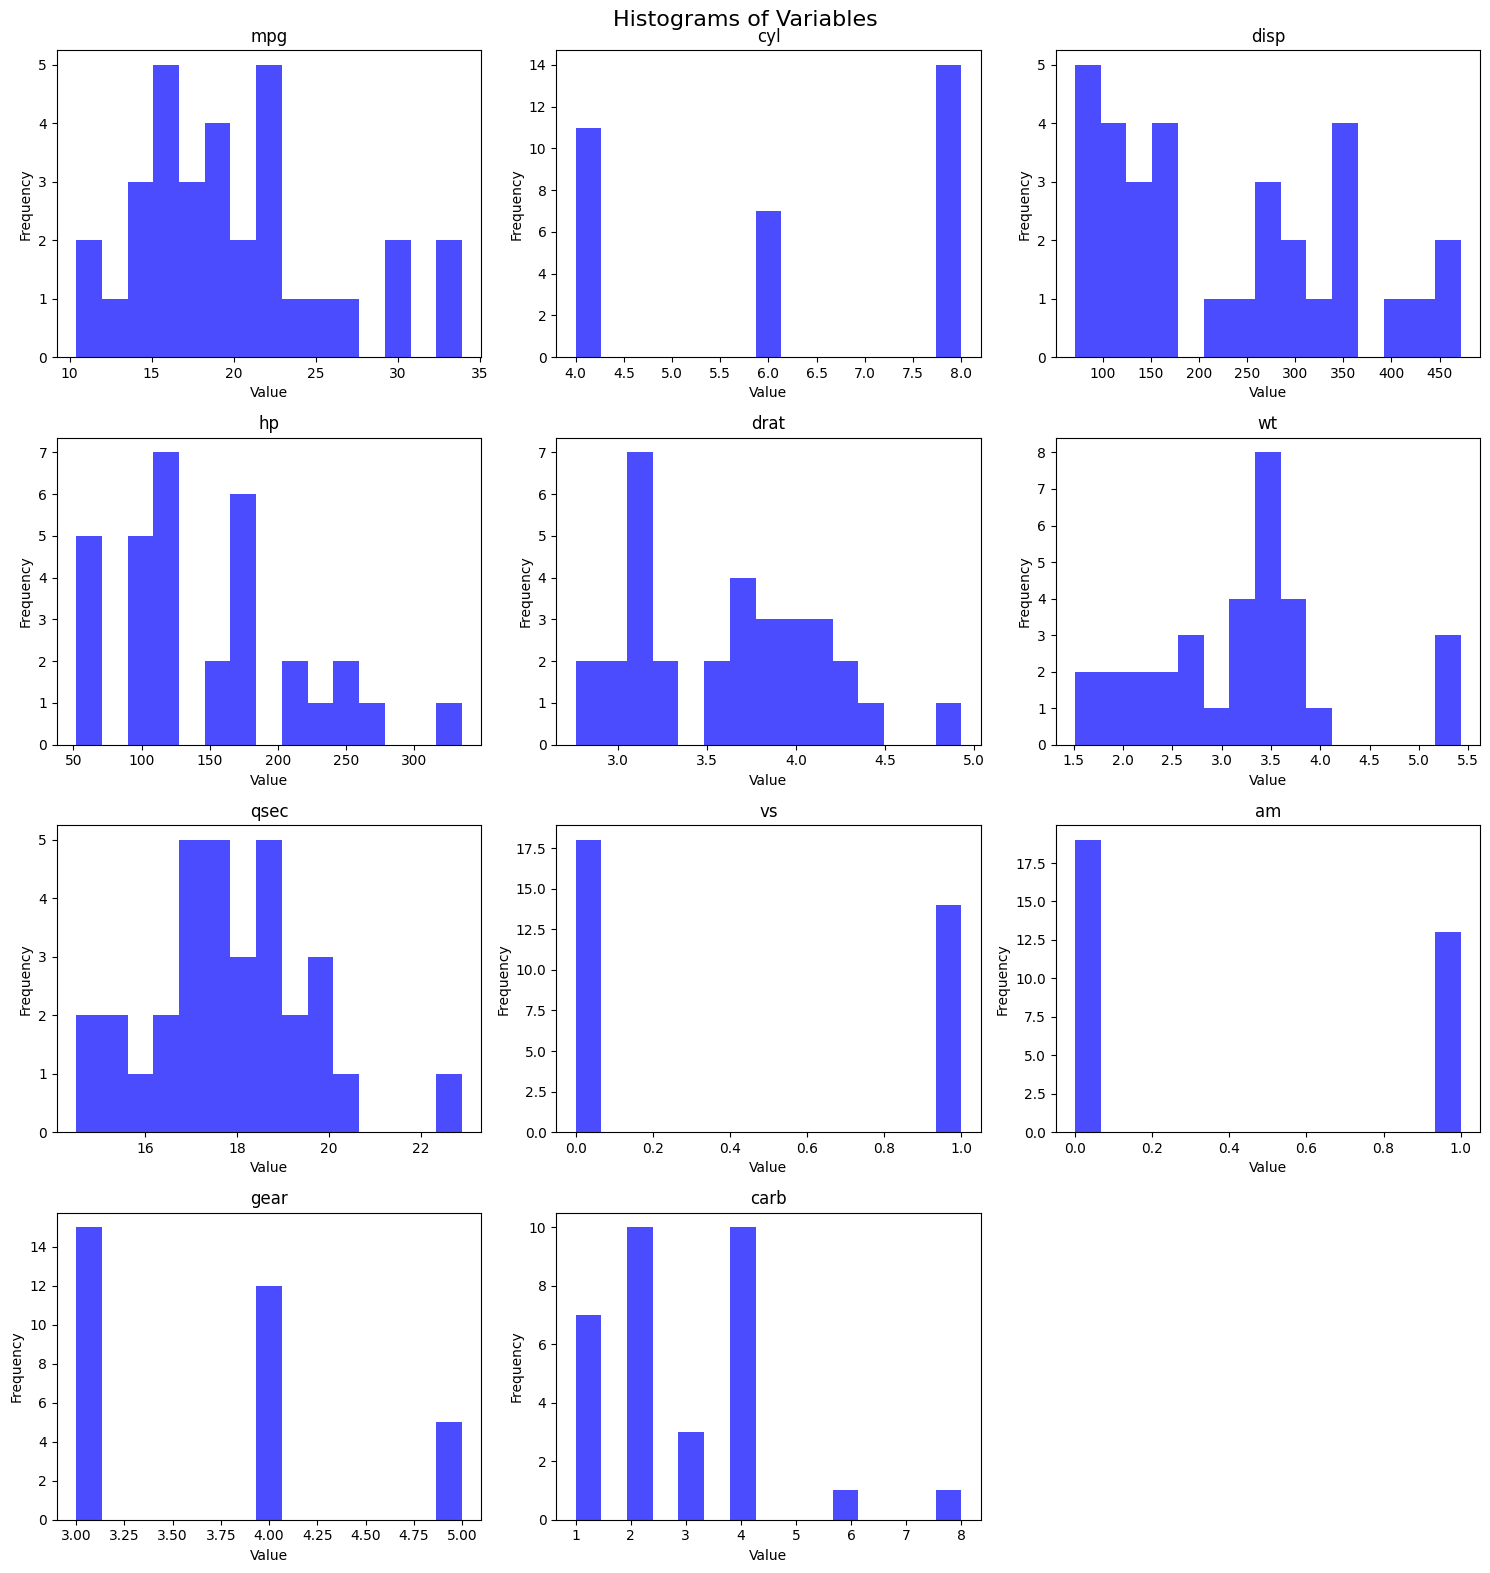

In [19]:
# 숫자형 피처만 선택
#(f.select_dtypes()를 사용해 데이터프레임에서 숫자형(float64, int64) 피처만 선택)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns 

# 서브플롯 배치 계산
num_features = len(numeric_features)
cols = 3  # 한 행에 3개의 그래프를 배치
rows = (num_features + cols - 1) // cols  # 필요한 행 개수 계산

# 히스토그램 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    ax.hist(df[feature], bins=15, color='blue', alpha=0.7)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# 빈 서브플롯 숨기기
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

# 전체 타이틀 설정
fig.suptitle("Histograms of Variables", fontsize=16)
plt.tight_layout()
plt.show()

#### Cylinder와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리기

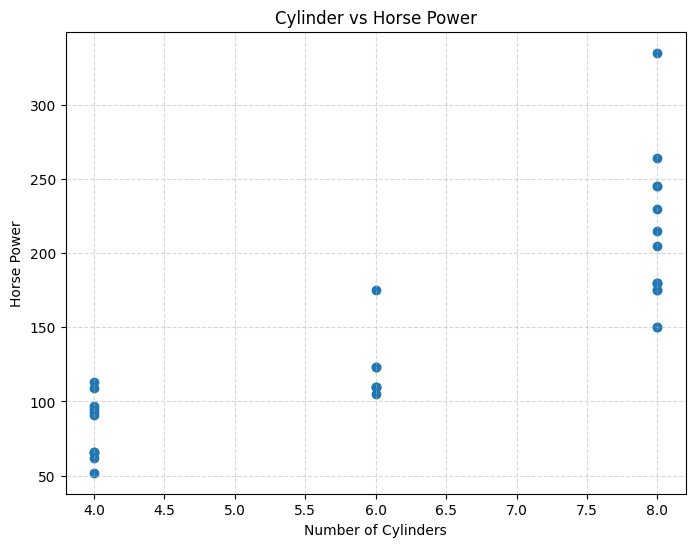

In [20]:
# Scatter Plot 생성
plt.figure(figsize=(8, 6))
plt.scatter(df['cyl'], df['hp'])

# 그래프 타이틀 및 축 레이블 설정
plt.title("Cylinder vs Horse Power")
plt.xlabel("Number of Cylinders")
plt.ylabel("Horse Power")


# 그래프 출력
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### MPG와 HorsePower 간의 상관 관계를 알아보기 위해 scatter 차트를 그리기

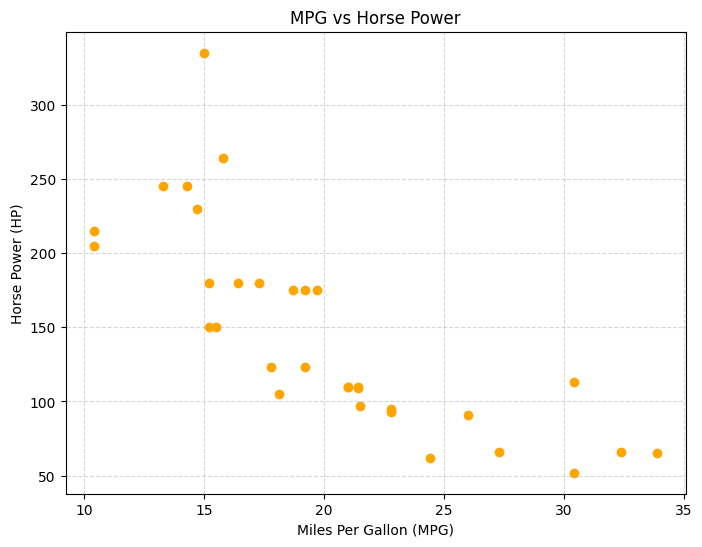

In [21]:
# Scatter Plot 생성
plt.figure(figsize=(8, 6))
plt.scatter(df['mpg'], df['hp'], color='orange')

# 그래프 타이틀 및 축 레이블 설정
plt.title("MPG vs Horse Power")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Horse Power (HP)")

# 그래프 출력
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관 계수 계산
correlation_matrix = numeric_df.corr()

# 상관 계수 출력
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      car

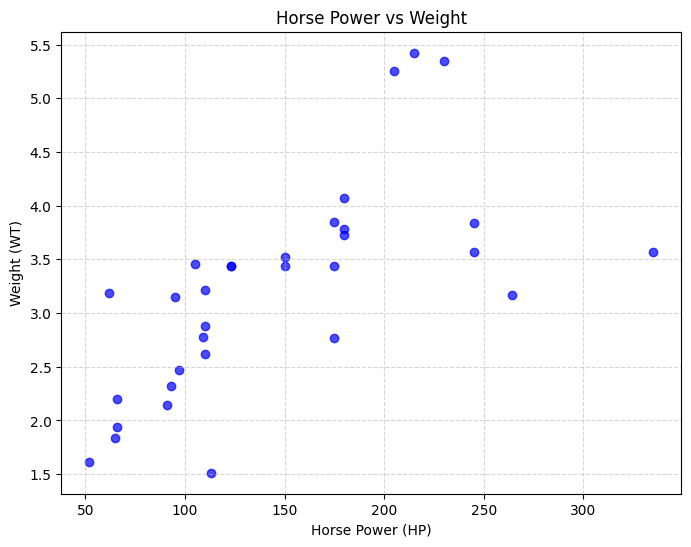

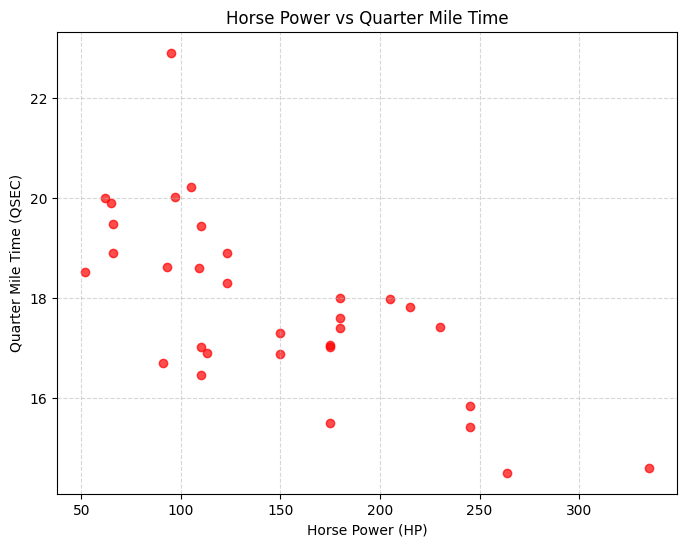

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 로드
url = "https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv"
df = pd.read_csv(url)
df.rename(columns={'Unnamed: 0': 'Car Name'}, inplace=True)

# 1. 마력과 차량 무게
plt.figure(figsize=(8, 6))
plt.scatter(df['hp'], df['wt'], alpha=0.7, color='blue')
plt.title("Horse Power vs Weight")
plt.xlabel("Horse Power (HP)")
plt.ylabel("Weight (WT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. 마력과 가속력
plt.figure(figsize=(8, 6))
plt.scatter(df['hp'], df['qsec'], alpha=0.7, color='red')
plt.title("Horse Power vs Quarter Mile Time")
plt.xlabel("Horse Power (HP)")
plt.ylabel("Quarter Mile Time (QSEC)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()